In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, buttord, cheb1ord, cheby1, cheb2ord, cheby2
import soundfile as sf

a.	Load the audio1.wav and audio2.wav files. Plot the raw signal and analyze them using FT.

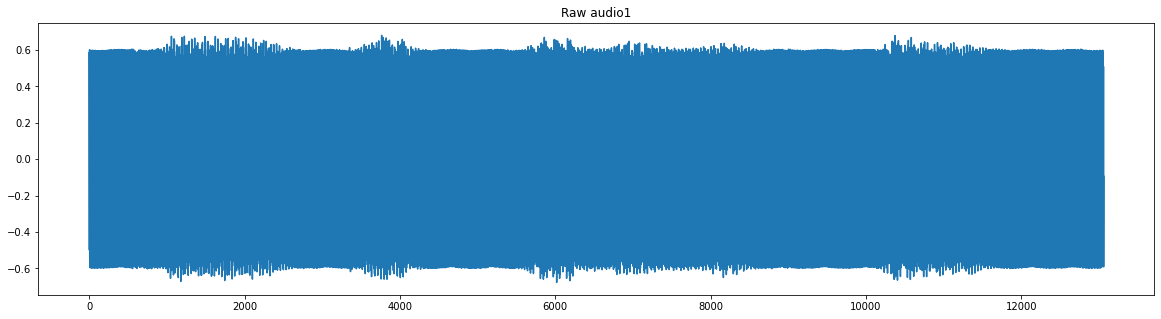

In [78]:
data,samp= sf.read("audio1.wav")
plt.figure(figsize=(20,5))
plt.title("Raw audio1")
plt.plot(np.arange(len(data)),data)

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


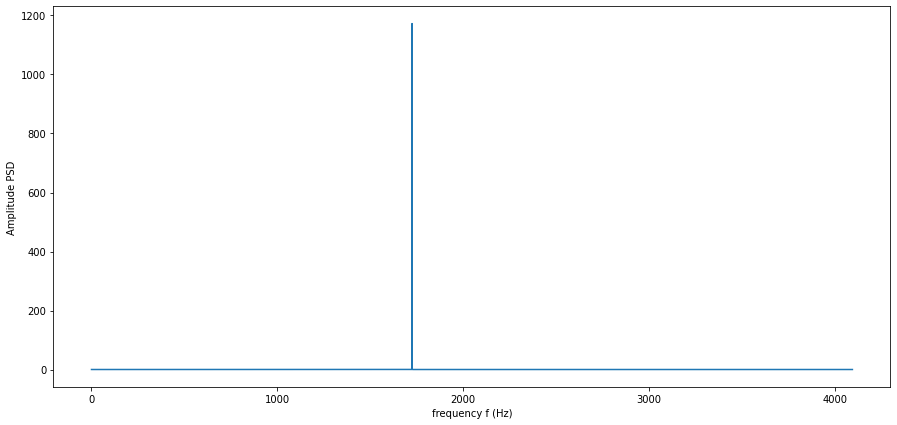

In [79]:
def TransformData(data_seg):
    N = len(data_seg)
    X = np.fft.fft(data_seg)
    PSD = X*np.conj(X)/N
    f = np.arange(0,samp/2,samp/N)

    plt.figure(figsize = (15,7))
    plt.plot(f,PSD[:int(N/2)+1])
    plt.xlabel("frequency f (Hz)")
    plt.ylabel("Amplitude PSD")
    plt.show()

PSD = TransformData(data)

b.	Design digital filters to remove noise in these audio files

In [84]:
fc = 500
fs = samp
fp = 1700 
Ap = 1
As = 60

In [85]:
order,_ = buttord(fc,fp,Ap,As,fs = fs)
print(order)
b,a = butter(order,fc,fs = fs,btype="low")

6


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


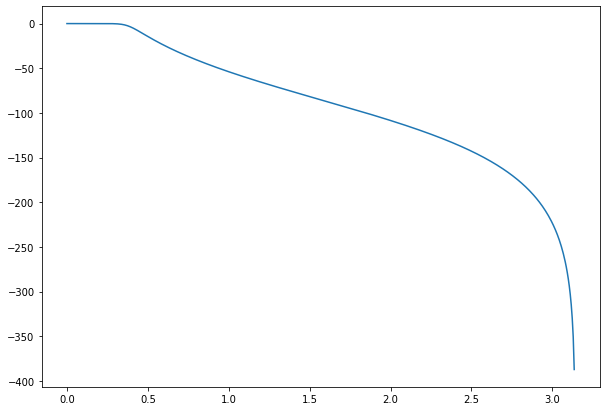

In [86]:
w,H = freqz(b,a)
plt.figure(figsize = (10,7))
plt.plot(w,20*np.log10(H))

In [87]:
y = lfilter(b,a,data)

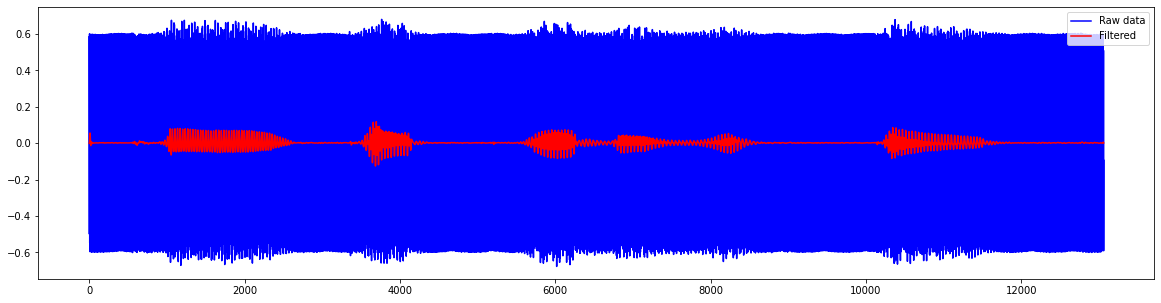

In [88]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(data)),data,"b",label = "Raw data")
plt.plot(np.arange(len(data)),y,"r",label = "Filtered")
plt.legend()

In [89]:
sf.write("audio1_filtered.wav",y,samp)